In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from tic_env import TictactoeEnv, OptimalPlayer

In [2]:
env = TictactoeEnv()

In [52]:
from collections import defaultdict
from random import randint
from random import random
    
def valid_move(grid, move):
    return grid[move] == 0

def agrmax(array):
    i_max = 0
    for i, elem in enumerate(array):
        if elem>array[i_max]:
            i_max = i
    return i_max

def grid_repr(grid):
    between_0_2 = grid.reshape((9))+1
    power_of_3 = 3**np.arange(9)
    return (between_0_2*power_of_3).sum()


class QLearning():
    
    def __init__(self, alpha=0.05, gamma=0.99, epsilon=0.1):
        self.q_values = defaultdict(lambda : 0)
        self.last_grid = None
        self.last_action = None

        self.alpha=alpha
        self.gamma=gamma
        self.epsilon=epsilon
        
    
        
       
        
    def act(self, grid):
        move = self._act_random(grid) if random()<self.epsilon else self._act_optimal(grid)
        self._update_qvalue(grid, move)
        
       
        return move
    
    
    def _act_optimal(self, grid):
        actions = [(x,y) for x in range(3) for y in range(3) if valid_move(grid, (x,y))]
        actions_values = list([self.q_value(grid, a) for a in actions])
        
        move = actions[agrmax(actions_values)]
        return move
        
        
    def _act_random(self, grid):
        actions = [(x,y) for x in range(3) for y in range(3) if valid_move(grid, (x,y))]
        move = actions[randint(0,len(actions)-1)]
        return move
    
    def q_value(self, grid, move):
        return self.q_values[(grid_repr(grid),move)]
    def change_qvalue(self, grid, move, value):
        self.q_values[(grid_repr(grid),move)] = value
    
    
    def update_qvalue_end(self, reward=0):
        if self.last_grid is not None and self.last_action is not None:
            state_action = (self.last_grid,self.last_action)
            estimated_q = self.q_value(*state_action)
            delta_q = reward  - estimated_q
            self.change_qvalue(*state_action, estimated_q+self.alpha*delta_q)
          
        
     
        self.last_grid = None
        self.last_action = None
          
    
    def _update_qvalue(self,grid, move, reward=0):
        if self.last_grid is not None and self.last_action is not None:
            action = self._act_optimal(grid)
            state_action = (self.last_grid,self.last_action)
            estimated_q = self.q_value(*state_action)
            delta_q = reward + self.gamma*self.q_value(grid,action) - estimated_q
            self.change_qvalue(*state_action, estimated_q+self.alpha*delta_q)
        
            
        self.last_grid = grid
        self.last_action = move
        
    def update_epsilon(self, new_epsilon):
        self.epsilon = new_epsilon 

In [53]:
env = TictactoeEnv()
Turns = np.array(['X','O'])
q_player = QLearning()
avg_rewards = [] #list that stores the avg reward for each 250 games
s = 0

for i in range(20000):
    grid, _, __ = env.observe()
    player_opt = OptimalPlayer(epsilon=0.5, player=Turns[np.mod(i,2)])
    
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = q_player.act(grid)
        grid, end, winner = env.step(move, print_grid=False)

        if end:
            if np.mod(i,1000) == 0:
                print('-------------------------------------------')
                print('Game: ' + str(i))
                print('Optimal player = ' +  Turns[np.mod(i,2)])
                print('Q player = ' +  Turns[np.mod(i+1,2)])
                print('Game ended, winner is player ' + str(winner))
                
               
            
            
            q_player_reward = env.reward(player=Turns[np.mod(i+1,2)])
            
            # Storing q_player_reward
            s += q_player_reward 
            if np.mod(i+1, 250) == 0:
                avg_rewards.append(s / 250.0)
                s = 0
            q_player.update_qvalue_end(reward=q_player_reward)
            
    
            env.reset()
            break

-------------------------------------------
Game: 0
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 1000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 2000
Optimal player = X
Q player = O
Game ended, winner is player None
-------------------------------------------
Game: 3000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 4000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 5000
Optimal player = X
Q player = O
Game ended, winner is player O
-------------------------------------------
Game: 6000
Optimal player = X
Q player = O
Game ended, winner is player None
-------------------------------------------
Game: 7000
Optimal player = X
Q player = O
Game ended, winner is player O
-------------------------------------------
Game: 800

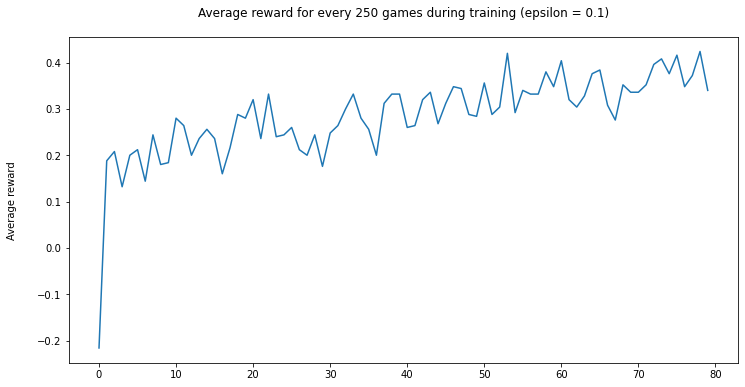

In [54]:
fig = plt.figure(figsize=(12,6))
ax = sns.lineplot(x=range(0, len(avg_rewards)), y = avg_rewards)
ax.set_title('Average reward for every 250 games during training (epsilon = 0.1)', pad = 20)
plt.ylabel('Average reward', labelpad = 20)
plt.show()